In [2]:
#https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats

import matplotlib as mat
import matplotlib.pyplot as plt
mat.style.use('ggplot')

from src.pricer.monte_carlo_pricer import*
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
np.random.seed(100)

Q: How does the number of trials impact the variance of the estimator of the true mean. 

The variance of the estimator is know to decrease as the number of trials increase. We test this by running 100 episodes for trial size starting from 1000 to 15000 in increments of 1000. We should be able to observe a decrease in the variance of the estimator as we try larger trial sizes.

Note that the Monte Carlo Pricer is using a weiner process $S_{T} = S_{t}e^{(r-0.5\sigma^2)(\frac{1}{T})+\sigma \sqrt{\frac{1}{T}}\epsilon}$ where $\epsilon$ is sampling from a standardized normal distribution.

In [4]:
S,X,t,T,v,r,d = (100.0, 110.0, 100, 365, 0.20, 0.01, 0.00)

In [5]:
MC = MCPricer(S, r,"normal", T=T)
nmcps = []
for n in range(100,15000,1000):
    mcps = []
    for i in range(100):
        MC.simulate(n,t,v)
        mcp = MC.price(110)
        mcps.append(mcp)
        MC.reset_state()
    nmcps.append(mcps)
    

Initialized MC Pricer


The box plot doesnt visually show the exact variance, but we can clearly see the ranges of the computed means increasing as the number of trials increases.

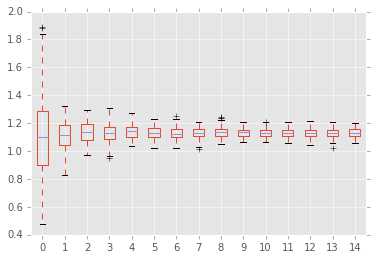

In [6]:
# https://stackoverflow.com/questions/12082568/what-exactly-do-the-whiskers-in-pandas-boxplots-specify
df = pd.DataFrame(columns=range(15))
for i,mcps in enumerate(nmcps):
    df.loc[:,i] = mcps
df.plot.box()


We can also see the variance of the computed means decrease as number of trials increase.

In [7]:
df.var()

0     0.101015
1     0.010414
2     0.005689
3     0.004262
4     0.002908
5     0.001886
6     0.001740
7     0.001515
8     0.001545
9     0.001180
10    0.001030
11    0.001057
12    0.001154
13    0.001248
14    0.000897
dtype: float64